# PR3C Interno

Con el Hamiltoniano secular de Vinson (2018) vimos que, debido a que $M$ y $\Omega$ no aparecen, tenemos 2 constantes de integración, y una de ellas relaciona a $i$ y $e$.

Gallardo et al. (2012) nos muestra estas curvas de $i,e$ parametrizadas por el Hamiltoniano, y en este notebook intentamos replicarlas.

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import axes3d

pi = -4*np.arctan(-1)

# INTEGRAR t vs e

## CURVAS ANALÍTICAS

In [2]:
def Jz(e,i):
    jz = np.sqrt(1 - e**2)*np.cos(i)
    return jz

In [11]:
N = 100    # resolución de la grilla en cada eje

e_i = 0.   # límites del eje de e
e_f = 1.   #

i_i = 0.            # límites del eje de i
i_f = 90*pi/180.    # 

e_l = np.linspace(e_i,e_f,N)
i_l = np.linspace(i_i,i_f,N)

### Tabla de valores

In [12]:
Jz_l = np.zeros((N,N))
for j,e_j in enumerate(e_l):
    for k,i_k in enumerate(i_l):
        Jz_l[j,k] = Jz(e_j,i_k)

### Gráfico de superficie
Aunque el gráfico 3D no nos sirve, por lo que nos quedamos con el gráfico de más adelante

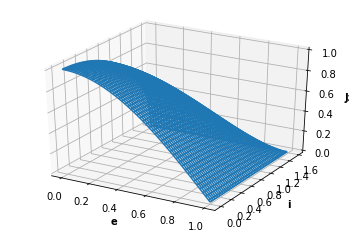

In [5]:
e_l2,il_2 = np.meshgrid(e_l,i_l)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(e_l2,il_2,Jz_l)
ax.set_xlabel('e',fontweight='bold')
ax.set_ylabel('i',fontweight='bold')
ax.set_zlabel('Jz',fontweight='bold')
plt.show()

 
 

# CURVAS EMPÍRICAS

### Fijamos un Jz y vemos e vs i

In [6]:
N = 60                            # resolucion de cada eje             
N_J = 15                          # cuantas curvas queremos mostrar por default

Jz_ll = np.linspace(0,0.99,N_J)   # valor de Jz para cada curva

i_i = 0.                          # limites de inclinacion
i_f = 90*pi/180.                  # equispaciados

i_l = np.linspace(i_i,i_f,N)      # lista de inclinaciones

Definimos la función para obtener $e$ a partir de $i$ y $J$

In [7]:
def e_f(i,J):                                 # esta funcion toma un dominio (lista de inc) y una lista
                                              # de valores de J y devuelve la imagen (lista de e), es decir
    e_fl = np.zeros((N_J,len(i)))             # crea una curva por cada valor de J
    
    for k in range(len(J)):
        for j in range(len(i)):
            ef = np.sqrt(1 - (J[k]/np.cos(i[j]))**2)
            e_fl[k][j] = ef
        
    return(e_fl)

#### Parámetros de nuestra particula a integrar (elegimos e,inc, y la Jz ya está determinada)

In [8]:
i_x = 45*pi/180.                           # Valor de inc de la particula
e_x = 0.267                                 # Valor de e de la particula
Jz_x = np.sqrt(1 - e_x**2)*np.cos(i_x)     # La J ya está determinada


t_int = 10000                               # Tiempo de integración (en años)

/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


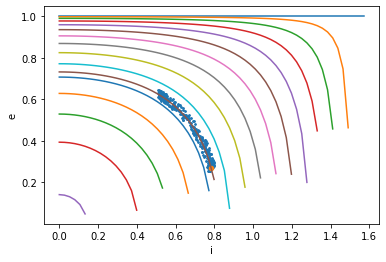

In [9]:
p=0

e_xl = []
i_xl = []

sim = rebound.Simulation()

sim.add(m=1)                                           # primaria

sim.add(m=0,a=2.5,e=e_x,inc=i_x)                            # particula

sim.add(m=1e-3,a=5.2,e=0,inc=0,l=0,Omega=0,pomega=0)    # secundaria

# ---------------------- integramos

os = sim.calculate_orbits()
sim.integrator = "whfast" 
sim.dt = 0.05 * os[0].P  # dt = 5% del periodo de la orbita mas chica
Nout = 300               # number of points to display
tmax = t_int*365.25          # integrar por 2 yr
Nmoons = 2

ecc = np.zeros((Nmoons,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles
elem = np.zeros((Nout,7))

for i,time in enumerate(times):

    sim.integrate(time)
    os = sim.calculate_orbits()

    e_xl.append(os[0].e)
    i_xl.append(os[0].inc)

    p = p+1                                     #
    perc = np.round((p/(Nout))*100,decimals=1)   #  porcentaje de progreso del programa
    print(str(perc)+'%',end='\r')               #


e_l2 = []

for i in range(len(i_l)):
    e = np.sqrt(1 - (Jz_x/np.cos(i_l[i]))**2)
    e_l2.append(e)
    
    
p_l = e_f(i_l,Jz_ll)

for k in range(N_J):
    plt.plot(i_l,p_l[k])
plt.plot(i_l,e_l2)
plt.scatter(i_xl,e_xl,s=3)
plt.scatter(i_x,e_x,s=20)
plt.xlabel('i')
plt.ylabel('e')
plt.show()

#### Para corregir algo del integrador, agregamos las siguientes líneas y lo volvimos a correr:

sim.ri_whfast.safemode = 0

sim.ri_whfast.corrector = 11

/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in sqrt
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


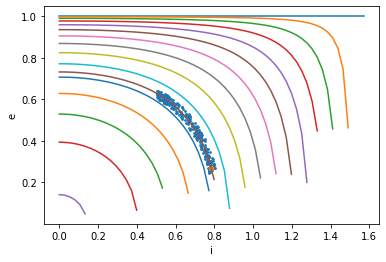

In [10]:
p=0

e_xl = []
i_xl = []

sim = rebound.Simulation()

sim.add(m=1)                                           # primaria

sim.add(m=0,a=2.5,e=e_x,inc=i_x)                            # particula

sim.add(m=1e-3,a=5.2,e=0,inc=0,l=0,Omega=0,pomega=0)    # secundaria

# ---------------------- integramos

sim.ri_whfast.safemode = 0
sim.ri_whfast.corrector = 11

os = sim.calculate_orbits()
sim.integrator = "whfast" 
sim.dt = 0.05 * os[0].P  # dt = 5% del periodo de la orbita mas chica
Nout = 300               # number of points to display
tmax = t_int*365.25          # integrar por 2 yr
Nmoons = 2

ecc = np.zeros((Nmoons,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles
elem = np.zeros((Nout,7))

for i,time in enumerate(times):

    sim.integrate(time)
    os = sim.calculate_orbits()

    e_xl.append(os[0].e)
    i_xl.append(os[0].inc)

    p = p+1                                     #
    perc = np.round((p/(Nout))*100,decimals=1)   #  porcentaje de progreso del programa
    print(str(perc)+'%',end='\r')               #


e_l2 = []

for i in range(len(i_l)):
    e = np.sqrt(1 - (Jz_x/np.cos(i_l[i]))**2)
    e_l2.append(e)
    
    
p_l = e_f(i_l,Jz_ll)

for k in range(N_J):
    plt.plot(i_l,p_l[k])
plt.plot(i_l,e_l2)
plt.scatter(i_xl,e_xl,s=3)
plt.scatter(i_x,e_x,s=20)
plt.xlabel('i')
plt.ylabel('e')
plt.show()